## Telecom Industry EDA Solution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mydata = pd.read_csv('Telecom_Industry.csv')

In [3]:
mydata.shape

(3333, 11)

In [4]:
mydata.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [5]:
mydata.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3331.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237346
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.792675
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [6]:
mydata.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [7]:
mydata.tail(5)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0
3332,0,74,1,1,3.70,0,234.4,113,100.0,13.30,13.7


In [8]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
Churn              3333 non-null int64
AccountWeeks       3333 non-null int64
ContractRenewal    3333 non-null int64
DataPlan           3333 non-null int64
DataUsage          3333 non-null float64
CustServCalls      3333 non-null int64
DayMins            3333 non-null float64
DayCalls           3333 non-null int64
MonthlyCharge      3333 non-null float64
OverageFee         3333 non-null float64
RoamMins           3331 non-null float64
dtypes: float64(5), int64(6)
memory usage: 286.5 KB


### Checking for null values

In [9]:
mydata.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           2
dtype: int64

In [10]:
data = mydata.copy()

In [11]:
data.RoamMins.fillna(data.RoamMins.median(), inplace=True)

In [12]:
data.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

### Plot 1: Percentage of churn label

In [13]:
%matplotlib inline
plt.rcParams['figure.figsize']=10,3
plt.style.use('seaborn-whitegrid')

Text(0.5, 1.0, '% of Churn')

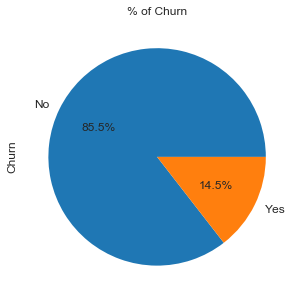

In [14]:
ax = (data['Churn'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('% of Churn', fontsize = 12)

### Plot 2: Contract Renewal

Text(0.5, 1.0, '% of ContractRenewal')

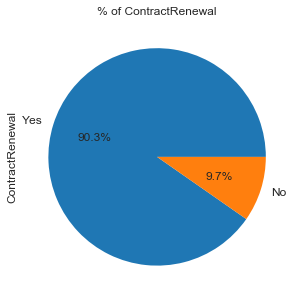

In [15]:
ax = (data['ContractRenewal'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['Yes', 'No'],figsize =(5,5), fontsize = 12 )
ax.set_ylabel('ContractRenewal',fontsize = 12)
ax.set_title('% of ContractRenewal', fontsize = 12)

### Plot 3: Count of customer service calls

Text(0.5, 0, 'CustServCalls')

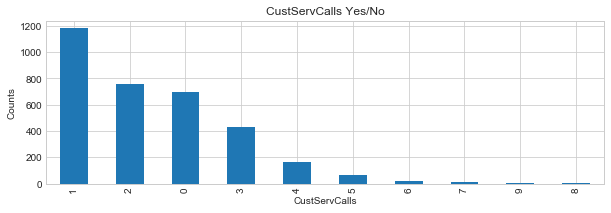

In [16]:

data.CustServCalls.value_counts().plot(kind='bar')
plt.title('CustServCalls Yes/No')
plt.ylabel('Counts')
plt.xlabel('CustServCalls') 


### Plot 4: Dataplan

Text(0.5, 1.0, '% of DataPlan')

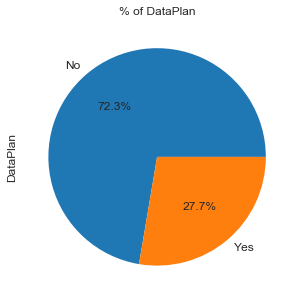

In [17]:
ax = (data['DataPlan'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
ax.set_ylabel('DataPlan',fontsize = 12)
ax.set_title('% of DataPlan', fontsize = 12)

Observation:
Percentage of customers having a dataplan is very high than that of not having a dataplan

### Plot 5: Subplots for Categorical variables

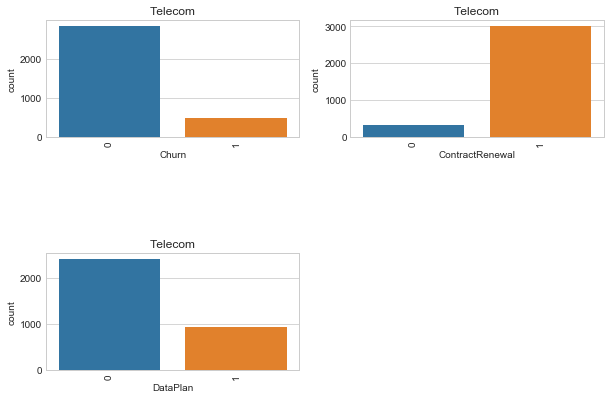

In [18]:
features=['Churn', 'ContractRenewal', 'DataPlan']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=90)
    plt.title("Telecom")
    
plt.show()

### Plot 6: Subplots for continious variables

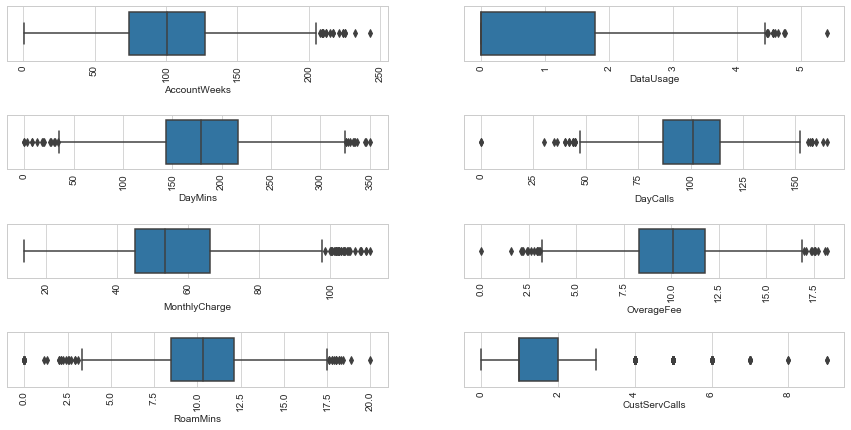

In [20]:
features=['AccountWeeks', 'DataUsage', 'DayMins', 'DayCalls','MonthlyCharge','OverageFee','RoamMins', 'CustServCalls']
fig=plt.subplots(figsize=(15,15))
for i, j in enumerate(features):
    plt.subplot(8, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.boxplot(x=j,data = data)
    plt.xticks(rotation=90)
    #plt.title("Telecom")
    
plt.show()

Note:
The distribution of the sample for specific variables may have a more extreme distribution than normal.
Treating or altering the outlier/extreme values in genuine observations is not a standard operating procedure.
If a data point (or points) is excluded from the data analysis, this should be clearly stated on any subsequent report.
A univariate outlier is a data point that consists of an extreme value on one variable.
A multivariate outlier is a combination of unusual scores on at least two variables.

Only when we are able to find the cause of the outliers, we can remove the outliers and use the existing data

### Plot 7: Data Usage vs Churn

In [21]:
%matplotlib inline
plt.rcParams['figure.figsize']=5,5
plt.style.use('seaborn-whitegrid')

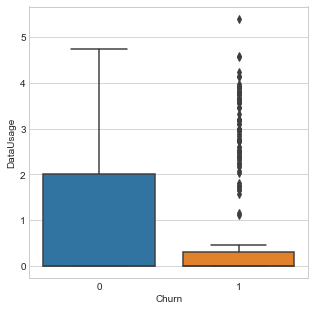

In [22]:
sns.boxplot(x = data.Churn, y = data.DataUsage)
# the customers who do not churn--> more datausage.

### Plot 8: Customer Service call vs Churn

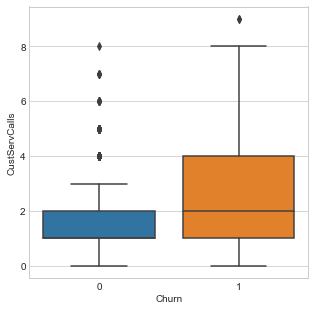

In [23]:
sns.boxplot(x = data.Churn, y = data.CustServCalls)


### Plot 9: Monthly charge vs churn

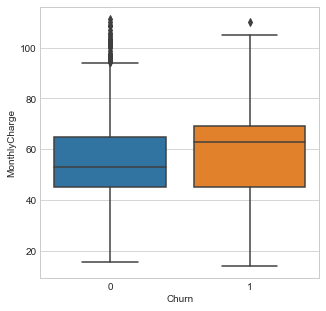

In [24]:
sns.boxplot(x = data.Churn, y = data.MonthlyCharge)


### Plot 10: Roaming minutes vs churn

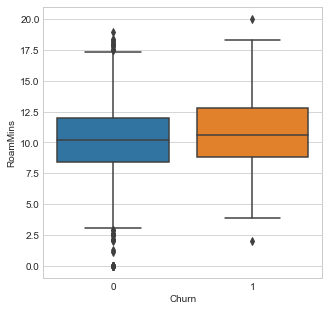

In [25]:
sns.boxplot(x = data.Churn, y = data.RoamMins)


### Plot 11: Customer Service calls vs Churn

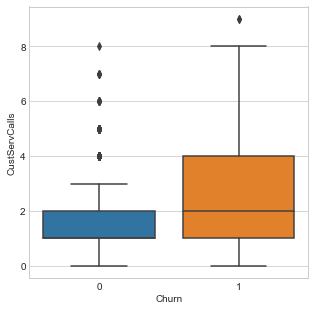

In [26]:
sns.boxplot(x = data.Churn, y = data.CustServCalls)


In [27]:
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [28]:
from scipy.stats import zscore

In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
out = le.fit_transform(data['Churn'])

out = pd.DataFrame(out,columns=['Churn'])
data.drop(columns='Churn',inplace=True)
data=data.apply(zscore)
data = pd.concat([data,out],axis=1)
data.head(4)

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
0,0.676489,0.327580,1.617086,1.480204,-0.427932,1.566767,0.476643,1.990727,-0.071584,-0.085041,0
1,0.149065,0.327580,1.617086,2.266072,-0.427932,-0.333738,1.124503,1.564510,-0.107082,1.240451,0
2,0.902529,0.327580,-0.618396,-0.641642,-1.188218,1.168304,0.675985,-0.262133,-1.574346,0.703089,0
3,-0.428590,-3.052685,-0.618396,-0.641642,0.332354,2.196596,-1.466936,0.042307,-2.741846,-1.303060,0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
AccountWeeks       3333 non-null float64
ContractRenewal    3333 non-null float64
DataPlan           3333 non-null float64
DataUsage          3333 non-null float64
CustServCalls      3333 non-null float64
DayMins            3333 non-null float64
DayCalls           3333 non-null float64
MonthlyCharge      3333 non-null float64
OverageFee         3333 non-null float64
RoamMins           3333 non-null float64
Churn              3333 non-null int64
dtypes: float64(10), int64(1)
memory usage: 286.5 KB


In [31]:
data1 = data.copy()
data1.RoamMins.fillna(data1.RoamMins.median(), inplace=True)
IV = pd.DataFrame(data1, columns=['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'])

DV = pd.DataFrame(data1, columns=['Churn'])

In [32]:
IV.head(4)

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0.676489,0.327580,1.617086,1.480204,-0.427932,1.566767,0.476643,1.990727,-0.071584,-0.085041
1,0.149065,0.327580,1.617086,2.266072,-0.427932,-0.333738,1.124503,1.564510,-0.107082,1.240451
2,0.902529,0.327580,-0.618396,-0.641642,-1.188218,1.168304,0.675985,-0.262133,-1.574346,0.703089
3,-0.428590,-3.052685,-0.618396,-0.641642,0.332354,2.196596,-1.466936,0.042307,-2.741846,-1.303060


In [33]:
data.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
0,0.676489,0.327580,1.617086,1.480204,-0.427932,1.566767,0.476643,1.990727,-0.071584,-0.085041,0
1,0.149065,0.327580,1.617086,2.266072,-0.427932,-0.333738,1.124503,1.564510,-0.107082,1.240451,0
2,0.902529,0.327580,-0.618396,-0.641642,-1.188218,1.168304,0.675985,-0.262133,-1.574346,0.703089,0
3,-0.428590,-3.052685,-0.618396,-0.641642,0.332354,2.196596,-1.466936,0.042307,-2.741846,-1.303060,0
4,-0.654629,-3.052685,-0.618396,-0.641642,1.092641,-0.240090,0.626149,-0.931902,-1.037927,-0.049216,0


In [34]:
data.to_excel('telecomunication.xlsx')

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logreg = LogisticRegression()

In [37]:
X = data.drop(columns=['Churn'])
y = data['Churn']

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [39]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_pred=logreg.predict(X_test)

In [41]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[703,  16],
       [ 92,  23]], dtype=int64)

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8705035971223022
Precision: 0.5897435897435898
Recall: 0.2


In [43]:
y_predt=logreg.predict(X_train)

In [44]:
print("Accuracy:",metrics.accuracy_score(y_train, y_predt))
print("Precision:",metrics.precision_score(y_train, y_predt))
print("Recall:",metrics.recall_score(y_train, y_predt))

Accuracy: 0.8571428571428571
Precision: 0.5454545454545454
Recall: 0.1793478260869565


In [45]:
from sklearn.metrics import classification_report


In [46]:
print(classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       719
           1       0.59      0.20      0.30       115

    accuracy                           0.87       834
   macro avg       0.74      0.59      0.61       834
weighted avg       0.84      0.87      0.84       834



In [47]:
print(classification_report (y_train, y_predt))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2131
           1       0.55      0.18      0.27       368

    accuracy                           0.86      2499
   macro avg       0.71      0.58      0.60      2499
weighted avg       0.82      0.86      0.82      2499



In [48]:
data['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

# there is a imbalance in data. so we are going to do smote.

In [49]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27)
X, y = sm.fit_sample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [50]:
y.value_counts()

1    2850
0    2850
Name: Churn, dtype: int64

In [51]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)


In [52]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7824561403508772
Precision: 0.7756849315068494
Recall: 0.7947368421052632


In [53]:
y_predt=lr.predict(X_train)

In [54]:
print("Accuracy:",metrics.accuracy_score(y_train, y_predt))
print("Precision:",metrics.precision_score(y_train, y_predt))
print("Recall:",metrics.recall_score(y_train, y_predt))

Accuracy: 0.7690789473684211
Precision: 0.7696703296703297
Recall: 0.7679824561403509


# we can see there is significant improvement in recall after smote

In [55]:
print(classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       570
           1       0.78      0.79      0.79       570

    accuracy                           0.78      1140
   macro avg       0.78      0.78      0.78      1140
weighted avg       0.78      0.78      0.78      1140



In [56]:
print(classification_report (y_train, y_predt))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      2280
           1       0.77      0.77      0.77      2280

    accuracy                           0.77      4560
   macro avg       0.77      0.77      0.77      4560
weighted avg       0.77      0.77      0.77      4560

